<strong>Problem.</strong> We want to solve, using Finite Differences, the following problem:

$$
-u''=g(x),\quad in \Omega=(0,2\pi),\\
u(0)=u(2\pi)=0
$$

with $g(x)=\sin(x)$.$\\$
The solution is simply $u(x)=\sin(x)$.$\\$
We'll use a grid of N points with $x_0=0, x_{N-1}=2\pi$ and $\Delta x=\frac{2\pi}{N-1}$.$\\$
In each point of the grid the equation can be discretized as:$\\$
$$
-\frac{u_{i+1}-2u_i+u_{i-1}}{\Delta x^2}=g_i,
$$
where $g_i=g(x_i)$.$\\$
We keep the boundary points fixed, so we only need to solve for the $N-2$ interior points. Near the boundaries, our difference is:

$$
-u_2+2u_1=\Delta x^2g_1
$$
and
$$
2u_{N-1}-u_{N-2}=\Delta x^2g_{N-1}
$$

We can write the system of equations for solving for the N-2 interior points as:

$$
\begin{bmatrix}
2 & -1 \\
-1 & 2 & -1\\
 & -1 & 2 & -1\\
 & & \ddots & \ddots & \ddots\\
 & & & \ddots & \ddots & \ddots\\
 & & & & -1 & 2 & -1\\
 & & & & & -1 & 2\\
\end{bmatrix}
$$

$$
u = \begin{bmatrix}
u_1\\
u_2\\
\vdots\\
u_{N-2}\\
u_{N-1}\\
u_N\\
\end{bmatrix},\quad
g = \Delta x^2 \begin{bmatrix}
g_1\\
g_2\\
\vdots\\
g_{N-2}\\
g_{N-1}\\
g_N\\
\end{bmatrix}
$$

Then we just solve $Au=g$.

In [5]:
import numpy as np
d=np.array([2,2,2]) #diagonal
l=np.array([-1,-1]) #lower diagonal
u=l #upper diagonal
A=np.diag(d)+np.diag(l,-1)+np.diag(u,1) #matrix
v=np.array([1,2,3]) #vector
print(A) #print matrix
np.dot(v,v) #vector product
L, _=np.linalg.eig(A) #eigenvalues of A
L #print eigenvalues

[[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]


array([3.41421356, 2.        , 0.58578644])

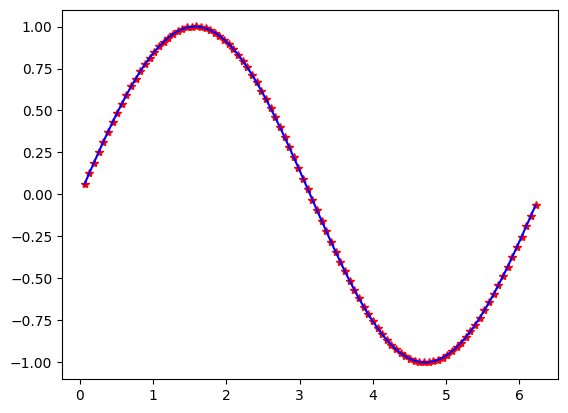

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#Generation of the grid (including endpoints)
N = 100 #Number of points
x = np.linspace(0.0, 2.0*np.pi, N) #Grid points
dx = x[1]-x[0] #Delta x

#Source term
g = np.sin(x)

#Vectors for building the matrix
e = np.ones(N-2)
d = 2*e
e1 = -1*np.ones(N-3)
u = e1
l = e1

#Construction of the matrix
A = np.diag(d) + np.diag(u,1) + np.diag(l,-1)

#Construction of the RHS
g = dx**2*g[1:N-1]

#Solution of the linear system (Au = g)
u = np.linalg.solve(A,g)

#Computation of the true solution
u_ex = np.sin(x[1:N-1])

#Plot of the numerical solution (red stars) against the true solution (blue)
plt.plot(x[1:N-1], u, 'r*', x[1:N-1], u_ex, 'b')

<h1>Copmutation of an integral</h1>

<strong>Problem.</strong> Compute numerically the integral of the function $f(x)=1/x$ with $1 \leq x \leq 5$, i.e.

$$
I=\int_1^5 \frac{1}{x}dx.
$$

In [10]:
from scipy import integrate
f = lambda x:1/x #Function to integrate
res=integrate.quad(f,1,5) #Integral of 1/x from 1 to 5
res

(1.6094379124341014, 3.6599536780638595e-09)

In [15]:
import sympy as sy
x = sy.symbols('x')
print(sy.integrate(1/x,x))
print(sy.integrate(1/x,(x,1,5)))

log(x)
log(5)


<h1>Visualize COVID data</h1>

In [ ]:
import pandas as pd

covid = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv')
covid.info() # Summary of the data

In [ ]:
covid1 = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=['Date'])
covid1.dtypes

covid1['Total Confiermed'] = covid1[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
covid1.tail()

worldwide = covid1.groupby('Date').sum()
c = worldwide.plot(figsize=(10,7))
c.set_xlabel('Month')
c.set_ylabel('# Cases')
c.title.set_text('Worldwide COVID19')

plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

plt.legend(bbox_to_anchor=(1.0,0.4))

plt.show()